<h1 align="center"> <font color='#880B03'>Notebook 1: Préparation de données</font> <h1> 

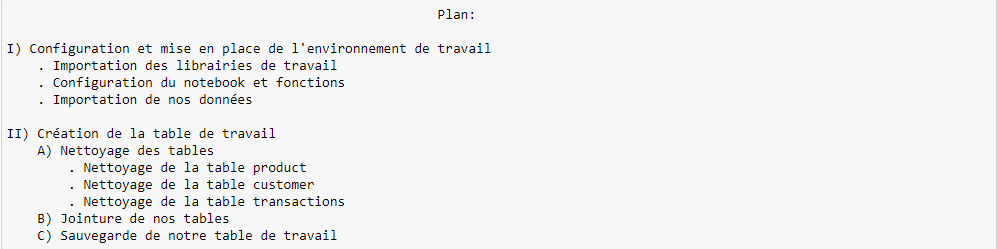

<h1 align="center"> <font color='#880B03'>I. Configuration et mise en place de l'environnement de travail</font>  <h1>

<h4 align="center"> <font color='#880B03'>Importation des librairies de travail</font>  <h4> 

In [86]:
# Importation de la librairie Pandas et numpy
import pandas as pd
import numpy as np

# Importation eviter les messages rouges d'erreurs
import warnings
warnings.filterwarnings("ignore")

# Importation datetime
from datetime import datetime
from datetime import date

# Import librairies pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

<h4 align="center"> <font color='#880B03'> Configuration du notebook et fonctions </font> <h4> 

In [ ]:
# Configuration du display options afficher toutes les lignes
pd.set_option("display.max_rows", None)

<h4 align="center"> <font color='#880B03'> Importation de nos données </font> <h4> 

In [87]:
# Importation du fichier population.csv
customer = pd.read_csv('C:/Users/alex/Desktop/Projet_6/données/customers.csv')

# Importation du fichier dispo_alimentaire.csv
product = pd.read_csv('C:/Users/alex/Desktop/Projet_6/données/product.csv')

# Importation du fichier aide_alimentaire.csv
transactions = pd.read_csv('C:/Users/alex/Desktop/Projet_6/données/transactions.csv')

<h1 align="center"> <font color='#880B03'>II. Création de la table de travail</font>  <h1>  

<h2 align="center"> <font color='#880B03'>A) Nettoyage des tables</font>  <h2>     

<h3 align="center"> <font color='#880B03'>Nettoyage de la table product </font>  <h3>        

In [88]:
# Consulte le nombre de colonnes et lignes

product.shape

(3287, 3)

In [89]:
# La nature des données dans chacune des colonnes

product.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [90]:
# Vérification pas de valeurs abéranttes dans les min et max par exemple --> ici un prix negatif

product.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [91]:
# Vérification qu'il n'y ait pas de valeur nulle

product.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [92]:
# Vérification qu'il n'y ait pas de doublons 

product.duplicated().sum()

0

In [93]:
# Affichage des 5 premières lignes de la table

product.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [94]:
# Regarde le champs: categ --> 3 categories

product['categ'].value_counts()

0    2309
1     739
2     239
Name: categ, dtype: int64

In [95]:
# Regarde le champs: id_prod --> on commence par le renommer pour garder la même syntaxe

product = product.rename(columns={"id_prod": "product_id"})

In [96]:
# Regarde le champs: id_prod --> on voit que dans l'ID nous avons la catégorie du livre

product['product_id'].value_counts()

0_1421    1
0_2298    1
0_870     1
0_1785    1
0_1876    1
         ..
0_2155    1
0_1118    1
2_12      1
2_20      1
0_1920    1
Name: product_id, Length: 3287, dtype: int64

In [97]:
# Teste pour voir si il y a plusieurs lettres dans ma colonne product ID
# Fait une copy du DF product, créer une colonne TEST avec juste la première partie de l'id, on vérifie l'unicité, on voit qu'un T

TEST_product = product.copy()
TEST_product['product_id'] = TEST_product['product_id'].astype(str).str.split('_')
TEST_product['product_id_TEST'] = product['product_id'].str[0]
TEST_product['product_id_TEST'].value_counts()

0    2308
1     739
2     239
T       1
Name: product_id_TEST, dtype: int64

 > *Un produit de test répertorié.*

In [98]:
# On va séléctionner l'id avec un T comme Test, on voit qu'il a un prix négatif, on va regarder le champs prix

TEST_product.loc[TEST_product['product_id_TEST'] =='T',:]

,product_id,price,categ,product_id_TEST
731,"[T, 0]",-1.0,0,T


In [99]:
# Regarde le champs: price --> prix negatif?

product['price'].describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

In [100]:
# On a un prix negatif, celui de l'id T

product.loc[product['price'] < 0,:]

,product_id,price,categ
731,T_0,-1.0,0


In [101]:
# On sauvegarde cette ligne avant de l'enlever de la table product

S_product = product.loc[product['price'] < 0,:]

In [102]:
# On enlève ce prix négatif du df + vérifie

product = product.loc[product['price'] >= 0,:]
product.shape

(3286, 3)

In [103]:
# Vérifie l'unicité de la clé

product['product_id'].nunique()

3286

In [104]:
# Création d'une liste de tous les product_id, qui servira plus tard

List_product_product_id = product['product_id'].tolist()

<h3 align="center"> <font color='#880B03'>Nettoyage de la table customer </font>  <h3>     

In [105]:
# Consulte le nombre de colonnes et lignes

customer.shape

(8623, 3)

In [106]:
# La nature des données dans chacune des colonnes

customer.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [107]:
# Vérification pas de valeurs abéranttes dans les min et max par exemple

customer.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [108]:
# Vérification qu'il n'y ait pas de valeur nulle

customer.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [109]:
# Vérification qu'il n'y ait pas de doublons 

customer.duplicated().sum()

0

In [110]:
# Affichage des 5 premières lignes de la table

customer.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


 > *On regarde les champs:*

In [111]:
# Regarde le champs: sex --> 2 categories

customer['sex'].value_counts()

f    4491
m    4132
Name: sex, dtype: int64

In [112]:
# Regarde le champs: birth --> année de naissance du client / type entier

customer['birth'].value_counts()

2004    440
1979    215
1988    207
1986    203
1978    199
       ... 
1933      8
1932      6
1931      4
1930      4
1929      3
Name: birth, Length: 76, dtype: int64

 > *Ajout du champ "Age":*

In [113]:
# Création colonne age qui comptient l'age du client

customer['age'] = pd.to_datetime('today').year - customer['birth']
customer['age'] = customer['age'].astype(int)

In [114]:
customer['age'].value_counts()

19    440
44    215
35    207
37    203
45    199
     ... 
90      8
91      6
92      4
93      4
94      3
Name: age, Length: 76, dtype: int64

In [115]:
# Création d'une nouvelle colonne categorie_age: Par tranche d'âge de 10 ans.

customer['categorie_age'] = pd.cut(customer['age'],
                               bins=[9,19,29,39,49,59,69,79,89,99],
                               labels=['tenties', 'twenties', 'thirties', 'fourties','fifties','sixties','seventies', 'eighties', 'nineties'])

In [116]:
# Transformation en category 

customer['categorie_age'] = customer['categorie_age'].astype('category')

In [117]:
# Regarde le champs: client_id --> On va séparer la premère et deuxième partie juste pour vérifier les lettres et numeros

customer['client_id'].value_counts()

c_4410    1
c_5441    1
c_5140    1
c_7935    1
c_7514    1
         ..
c_2797    1
c_818     1
c_3393    1
c_1497    1
c_84      1
Name: client_id, Length: 8623, dtype: int64

 > *Deux clients tests sont répertoriés.*

In [118]:
# Teste pour voir si il y a plusieurs lettres dans ma colonne client ID
# Fait une copy du DF customer, créer une colonne TEST avec juste la première partie de l'id, on vérifie l'unicité, on voit 2 CT

TEST_customer = customer.copy()
TEST_customer['client_id'] = TEST_customer['client_id'].astype(str).str.split('_')
TEST_customer['client_id_TEST'] = TEST_customer['client_id'].str[0]
TEST_customer['client_id_TEST'].value_counts()

c     8621
ct       2
Name: client_id_TEST, dtype: int64

In [119]:
# On va séléctionner l'id avec un T comme Test, on voit qu'il a un prix négatif, on va regarder le champs prix

TEST_customer.loc[TEST_customer['client_id_TEST'] =='ct',:]

,client_id,sex,birth,age,categorie_age,client_id_TEST
2735,"[ct, 0]",f,2001,22,twenties,ct
8494,"[ct, 1]",m,2001,22,twenties,ct


In [120]:
customer['client_id'].value_counts()

c_4410    1
c_5441    1
c_5140    1
c_7935    1
c_7514    1
         ..
c_2797    1
c_818     1
c_3393    1
c_1497    1
c_84      1
Name: client_id, Length: 8623, dtype: int64

In [121]:
# On sauvegarde ces deux lignes avant de les enlever de la table customer

S_customer = customer[customer['client_id'].str.contains('ct')]

In [122]:
# On enlève ces deux lignes du DF customer

customer = customer[~customer['client_id'].str.contains('ct')]

In [123]:
# Vérifie l'unicité de la clé

customer['client_id'].nunique()

8621

In [124]:
customer['client_id'].shape

(8621,)

In [125]:
# Création d'une liste de tous les client_id, qui servira plus tard

List_customer_client_id = customer['client_id'].tolist()

<h3 align="center"> <font color='#880B03'>Nettoyage de la table transactions </font>  <h3>      

In [126]:
# Consulte le nombre de colonnes et lignes

transactions.shape

(679532, 4)

In [127]:
# La nature des données dans chacune des colonnes

transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [128]:
# Vérification pas de valeurs abéranttes dans les min et max par exemple

transactions.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [129]:
# Vérification qu'il n'y ait pas de valeur nulle

transactions.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [130]:
#Vérification qu'il n'y ait pas de doublons, ici 126 regardons les champs et revenons dessus après

transactions.duplicated().sum()

126

In [131]:
# Comme pour le DF customer, on a des clients id 'ct'

transactions['client_id'].max()

'ct_1'

 > *200 transactions test sont répertoriés.*

In [132]:
# Teste pour voir si il y a plusieurs lettres dans ma colonne client ID
# Fait une copy du DF transactions, créer une colonne TEST avec juste la première partie de l'id, on vérifie l'unicité, on voit 200 CT

TEST_transactions = transactions.copy()
TEST_transactions['client_id'] = TEST_transactions['client_id'].astype(str).str.split('_')
TEST_transactions['client_id_TEST'] = TEST_transactions['client_id'].str[0]
TEST_transactions['client_id_TEST'].value_counts()

c     679332
ct       200
Name: client_id_TEST, dtype: int64

In [133]:
# On affiche les 200 client id qui contiennent des données de test

transactions[transactions['client_id'].str.contains('ct')]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [134]:
# On sauvegarde ces deux lignes avant de l'enlever de la table customer

S_transactions = transactions[transactions['client_id'].str.contains('ct')]

In [135]:
# On enlève ces deux lignes du DF customer

transactions = transactions[~transactions['client_id'].str.contains('ct')]

In [136]:
# Vérifie l'unicité de la clé

transactions['client_id'].nunique()

8600

 > *Préparation de la future jointure avec la table customer.*

 > *Préparation entre la table client et la table transaction:*

In [137]:
# Pour rappel customer n'a pas le meme nombre d'id client, normal car tous les clients n'ont pas formé passé de transactions

customer['client_id'].nunique()

8621

In [138]:
# # Création d'une liste de tous les client_id de la table transaction pour la comparer avec la liste de customer

List_transactions_client_id = transactions['client_id'].tolist()

In [139]:
# Récupère les valeurs uniques

List_transactions_client_id = np.unique(List_transactions_client_id).tolist()

In [140]:
# Vérifie la longueur de la liste qui con,tient que des valeurs unique

len(List_transactions_client_id)

8600

In [141]:
# Vérifie les listes entre le df client et celui-ci, pour se demander si les id client sont les mêmes.

List_PasCorrespondance_customer = [x for x in List_transactions_client_id + List_customer_client_id if x not in List_transactions_client_id or x not in List_customer_client_id]

In [142]:
# 21 ID qui ne correpondent pas, normal vu que 21 ID de plus pour la table customer
len(List_PasCorrespondance_customer)

21

In [143]:
# On regarde combien des 21 ID pas correspondant avec la table transactions appartient à la table customer, ici tous
# créer un client sans consommation

customer.loc[customer['client_id'].isin(List_PasCorrespondance_customer), :]

,client_id,sex,birth,age,categorie_age
801,c_8253,f,2001,22,twenties
2483,c_3789,f,1997,26,twenties
2734,c_4406,f,1998,25,twenties
2769,c_2706,f,1967,56,fifties
2851,c_3443,m,1959,64,sixties
3179,c_4447,m,1956,67,sixties
3190,c_3017,f,1992,31,thirties
3334,c_4086,f,1992,31,thirties
3721,c_6930,m,2004,19,tenties
3821,c_4358,m,1999,24,twenties


In [144]:
# Donc par définition aucun n'appartient à la table transactions

transactions.loc[transactions['client_id'].isin(List_PasCorrespondance_customer), :]

,id_prod,date,session_id,client_id


In [145]:
# Sauvegarder ces 21 clients pour la 1er jointure

In [146]:
# On sauvegarde toute l'autre partie qu'on utilisera pas dans le même df de sauvegarde S_customer

S_customer_TMP = customer.loc[customer['client_id'].isin(List_PasCorrespondance_customer), :]

S_customer = pd.concat([S_customer,S_customer_TMP])

In [147]:
# 21 + 2 = 23 valeur dans le DF customer de sauvegarde

S_customer.shape

(23, 5)

In [148]:
# Une fois stocké on peut donc les enlever de la table avec lequel on va continuer de travailler

customer = customer.loc[~customer['client_id'].isin(List_PasCorrespondance_customer), :]

In [149]:
# Vérifie qu'on donc 8621 - 21 ID clients

customer.shape

(8600, 5)

In [150]:
# Regarde le champs: id_prod --> on commence par le renommer pour garder la même syntaxe

transactions = transactions.rename(columns={"id_prod": "product_id"})

In [151]:
# Comme pour le DF customer on va vérifier si il y a pas de produit T (teste)

transactions['product_id']

0         0_1518
1          1_251
2         0_1277
3          2_209
4         0_1509
           ...  
679527    0_1551
679528     1_639
679529    0_1425
679530    0_1994
679531     1_523
Name: product_id, Length: 679332, dtype: object

In [152]:
# Teste pour voir si il y a plusieurs lettres dans ma colonne client ID
# Fait une copy du DF transactions, créer une colonne TEST avec juste la première partie de l'id
# Vérifie pas d'autre categorie de produit comme dans product avec 'T'


TEST_transactions = transactions.copy()
TEST_transactions['product_id'] = TEST_transactions['product_id'].astype(str).str.split('_')
TEST_transactions['product_id_TEST'] = TEST_transactions['product_id'].str[0]
TEST_transactions['product_id_TEST'].value_counts()

0    415680
1    227169
2     36483
Name: product_id_TEST, dtype: int64

 > *Préparation de la future jointure avec la table product:*

In [153]:
# Pour rappel 3286 ID unique dans la table produit

product['product_id'].nunique()

3286

In [154]:
# On regarde le nombre de id unique de la table transactions

transactions['product_id'].nunique()

3266

In [155]:
# Création d'une liste de tous les product_id de la table transaction pour la comparer avec la liste de product

List_transactions_product_id_TMP = transactions['product_id'].tolist()

In [156]:
# Récupère les valeurs uniques

List_transactions_product_id = np.unique(List_transactions_product_id_TMP).tolist()

In [157]:
# Vérifie la longueur de la liste qui contient que des valeurs uniques

len(List_transactions_product_id)

3266

In [158]:
# Vérifie les listes entre le df product et celui-ci, pour se demander si les id client sont les mêmes.

List_PasCorrespondance_product = [x for x in List_transactions_product_id + List_product_product_id if x not in List_transactions_product_id or x not in List_product_product_id]

In [159]:
# 22 ID qui ne correpondent pas, normal vu que 21 ID de plus pour la table customer
len(List_PasCorrespondance_product)

22

In [160]:
# On regarde combien des 22 ID pas correspondant avec la table transactions appartient à la table product, ici 21

product.loc[product['product_id'].isin(List_PasCorrespondance_product), :]

,product_id,price,categ
184,0_1016,35.06,0
279,0_1780,1.67,0
737,0_1062,20.08,0
794,0_1119,2.99,0
811,0_1014,1.15,0
846,1_0,31.82,1
1031,0_1318,20.92,0
1139,0_1800,22.05,0
1347,0_1645,2.99,0
1505,0_322,2.99,0


In [161]:
# Sauvegarde ces 21 produits pour la 2ieme jointure
# On sauvegarde toute l'autre partie qu'on utilisera pas dans le même df de sauvegarde S_customer

S_product_TMP = product.loc[product['product_id'].isin(List_PasCorrespondance_product), :]

S_product = pd.concat([S_product,S_product_TMP])

In [162]:
# 21 + 1(pdt test) = 22 valeur dans le DF product de sauvegarde

S_product.shape

(22, 3)

In [163]:
# Une fois stocké on peut donc les enlever de la table avec lequel on va continuer de travailler

product = product.loc[~product['product_id'].isin(List_PasCorrespondance_product), :]

In [164]:
# Vérifie qu'on donc 3286-21  ID product

product.shape

(3265, 3)

In [165]:
# On vérifie si le dernier id est bien dans transactions: Donc 22-21 1 ID devrait être ici 

transactions.loc[transactions['product_id'].isin(List_PasCorrespondance_product), :]

,product_id,date,session_id,client_id
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746
10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713
11727,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108
15675,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391
16377,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954
...,...,...,...,...
669730,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131
670682,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167
671286,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453
675679,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098


In [166]:
# On vérifie et oui l'ID 0_2245 est présent 221 fois dans la table transactions alors qu'il ne correpond a aucun produit
# de la table produit

produit_2245 = transactions.loc[transactions['product_id'] == '0_2245',:]
produit_2245

,product_id,date,session_id,client_id
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746
10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713
11727,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108
15675,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391
16377,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954
...,...,...,...,...
669730,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131
670682,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167
671286,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453
675679,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098


In [167]:
# On voit que le produit 0_2245 a été acheté par plusieurs clients, même si il représente que 0.03% du dataset (pas impactant)
# on va donc imputer ce produits à la table product ou il n'est pas présent

# Pourcentage des ventes du produit 0_2245
print('Produit 0_2245 :', round((len(produit_2245) / len(transactions) * 100), 2), '% du dataset')

Produit 0_2245 : 0.03 % du dataset


In [168]:
# Pour l'imputation dans la table product il nous manque son prix --> Plusieurs choix s'offre à nous: Le mode, la median, la moyenne

In [169]:
# Créer un df avec seulement tous les produits de categorie 0
categ0 = product.loc[product['categ']==0,:]

print('Categorie 0:',
      '\n-Prix moyen :', round(categ0['price'].mean(),2),
      '\n-Prix median:', round(categ0['price'].median(),2),
      '\n-Mode :', round(categ0['price'].mode(),2))



Categorie 0: 
-Prix moyen : 11.71 
-Prix median: 10.3 
-Mode : 0    4.99
Name: price, dtype: float64


<AxesSubplot:xlabel='price'>

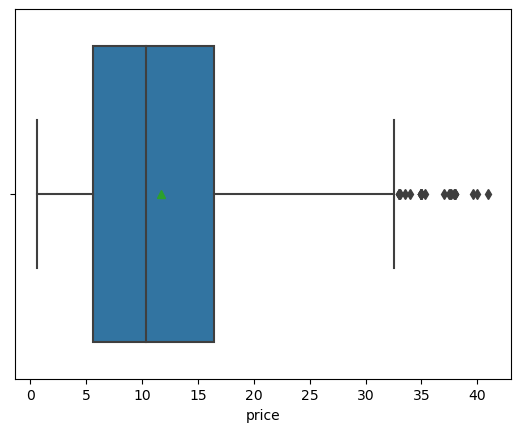

In [170]:
# On regarde la distribution du prix pour la categorie 0, le mode est peu représentatitf, par contre la median ou la moyenne 
# l'est plus. On va donc imputer par la moyenne

sns.boxplot(x=categ0['price'], showmeans=True)

In [171]:
# Nous connaissons la categorie de ce produit car il commence par 0 
# Nous connaissons pas son prix donc noud allons imputer sur le prix moyen des produit de categorie 0
# On recupere ce prix on l'arrondit à deux decimal comme tous les prix de cette table

Price_categ0_mean = round(categ0['price'].mean(),2)

In [172]:
# On ajoute ce produit dans la table product

product=product.append({'product_id' : '0_2245' , 'price' : Price_categ0_mean, 'categ' : 0} , ignore_index=True)

In [173]:
# On vérifie qu'il a bien été rajouté

product.loc[product['product_id']=='0_2245',:]

,product_id,price,categ
3265,0_2245,11.71,0


In [174]:
# Vérifie qu'on passe de 3265 à 3266 id uniques

product['product_id'].nunique()

3266

In [175]:
# Re créer la liste de tous les product_id

List_product_product_id = product['product_id'].tolist()

In [176]:
# Vérifie les listes entre le df product et celui-ci, pour se demander si les id client sont les mêmes.

List_PasCorrespondance_product = [x for x in List_transactions_product_id + List_product_product_id if x not in List_transactions_product_id or x not in List_product_product_id]

In [177]:
# On vérifie que cette fois ci aucun produit de la liste de non correspondance est présent dans la table transaction

transactions.loc[transactions['product_id'].isin(List_PasCorrespondance_product), :]

,product_id,date,session_id,client_id


In [178]:
# Vérifie la longueur de la table --> 679 332 transactions

transactions.shape

(679332, 4)

In [179]:
# On regarde le champs session_id

transactions['session_id'].value_counts()

s_118668    14
s_21005     13
s_179575    13
s_342045    13
s_96857     13
            ..
s_33111      1
s_22778      1
s_198924     1
s_45000      1
s_181434     1
Name: session_id, Length: 342315, dtype: int64

In [180]:
# On regarde le champs session ID : 342315 id session unique sur 500k transactions donc plusieurs fois même session possible

transactions['session_id'].nunique()

342315

In [181]:
# Plusieurs fois la même session 

transactions.loc[transactions['session_id'] == 's_118668',:]

,product_id,date,session_id,client_id
113905,0_1108,2021-11-12 20:20:33.659396,s_118668,c_5995
146395,0_1089,2021-11-12 20:02:54.200624,s_118668,c_5995
190002,0_1334,2021-11-12 20:08:40.783542,s_118668,c_5995
192700,1_396,2021-11-12 20:54:33.612303,s_118668,c_5995
231001,0_1519,2021-11-12 20:01:58.131234,s_118668,c_5995
264217,0_1430,2021-11-12 20:36:39.252082,s_118668,c_5995
403733,1_498,2021-11-12 20:18:11.950251,s_118668,c_5995
444176,0_1612,2021-11-12 20:27:59.185956,s_118668,c_5995
463852,0_1488,2021-11-12 20:23:50.319430,s_118668,c_5995
511579,2_209,2021-11-12 20:00:00.956739,s_118668,c_5995


In [182]:
# Teste pour voir si il y a plusieurs lettres dans ma colonne session ID
# Fait une copy du DF transactions, créer une colonne TEST avec juste la première partie de l'id, on vérifie l'unicité, ici seulement S

TEST_transactions['session_id'] = TEST_transactions['session_id'].astype(str).str.split('_')
TEST_transactions['session_id_TEST'] = TEST_transactions['session_id'].str[0]
TEST_transactions['session_id_TEST'].value_counts()

s    679332
Name: session_id_TEST, dtype: int64

In [183]:
# On regarde le champs date

transactions['date'] = pd.to_datetime(transactions['date'])

In [184]:
# Toutes dates uniques donc ca sera donc mon index de cette table, une transaction = une date

transactions['date'].duplicated().sum()

0

In [185]:
# On créait une colonne avec juste le mois et l'année de la transaction en format date --> qui servira pour les graphiques

transactions['Annee_Mois'] = transactions['date'].dt.strftime('%m/%Y')
transactions['Annee_Mois'] = pd.to_datetime(transactions['Annee_Mois'])

In [186]:
transactions.head()

,product_id,date,session_id,client_id,Annee_Mois
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-01
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-01
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-01
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-01
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-01


In [187]:
# On regarde pour quelle période nous avons les dates --> ici sur deux ans: 2021-03-01 au 2023-02-28

print('Transactions du', str(transactions['date'].min())[:10], 'au', str(transactions['date'].max())[:10])

Transactions du 2021-03-01 au 2023-02-28


In [188]:
transactions.head()

,product_id,date,session_id,client_id,Annee_Mois
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-01
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-01
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-01
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-01
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-01


In [189]:
# on vérification qu'il n'y ait pas de doublons après tout ca

transactions.duplicated().sum()

0

<h2 align="center"> <font color='#880B03'>B) Jointure de nos tables</font>  <h2>       

In [190]:
# Jointure entre customer et transactions

In [191]:
transactions['client_id'].nunique()

8600

In [192]:
customer['client_id'].nunique()

8600

In [193]:
# Jointure entre customer et transactions/ ici 8600ID correspondant

transactions_customer = pd.merge(transactions, customer, on=['client_id'], how='inner', indicator=True)

In [194]:
# Vérifie notre jointure

transactions_customer['_merge'].value_counts()

both          679332
left_only          0
right_only         0
Name: _merge, dtype: int64

In [195]:
# Supprime l'indicateur pour la prochaine jointure

transactions_customer.drop(columns=['_merge'], inplace=True)

In [196]:
transactions_customer.head()

,product_id,date,session_id,client_id,Annee_Mois,sex,birth,age,categorie_age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-01,f,1986,37,thirties
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,2022-06-01,f,1986,37,thirties
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,2023-02-01,f,1986,37,thirties
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,2021-04-01,f,1986,37,thirties
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,2022-03-01,f,1986,37,thirties


In [197]:
# Jointure entre transactions et product

In [198]:
transactions['product_id'].nunique()

3266

In [199]:
product['product_id'].nunique()

3266

In [200]:
# Jointure entre transactions_customer et product/ ici 3265 ID correspondant

df = pd.merge(transactions_customer, product, on=['product_id'], how='inner', indicator=True)

In [201]:
df['_merge'].value_counts()

both          679332
left_only          0
right_only         0
Name: _merge, dtype: int64

In [202]:
# Supprime l'indicateur pour epurer la table

df.drop(columns=['_merge'], inplace=True)

In [203]:
df.head()

,product_id,date,session_id,client_id,Annee_Mois,sex,birth,age,categorie_age,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-01,f,1986,37,thirties,4.18,0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,2021-07-01,f,1986,37,thirties,4.18,0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,2022-08-01,f,1986,37,thirties,4.18,0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,2021-05-01,f,1968,55,fifties,4.18,0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,2022-05-01,f,1968,55,fifties,4.18,0


In [204]:
# Ajoute des colonnes supplémentaires pour les analyses futures

# Jointure gauche pour  garder toutes mes données de la table df et y greffer juste le total_achat pour tout les clients

# Montant total par clients.
df = df.merge(
        df.pivot_table(
            index='client_id', values='price', 
            aggfunc='sum').reset_index().rename(
            columns={'price': 'total_achats'}),
        on='client_id', how='left')


# Nbr transactions par clients.
df = df.merge(
        df.pivot_table(
            index='client_id', values='price', 
            aggfunc='count').reset_index().rename(
            columns={'price': 'Nbr_Transaction'}),
        on='client_id', how='left')


# Panier moyen par clients.
df = df.merge(
        df.pivot_table(
             index='client_id', values='price', 
             aggfunc='mean').reset_index().rename(
             columns={'price': 'Panier_Moyen'}),
        on='client_id', how='left')
df['Panier_Moyen'] = df['Panier_Moyen'].round(2)

In [205]:
df.head()


,product_id,date,session_id,client_id,Annee_Mois,sex,birth,age,categorie_age,price,categ,total_achats,Nbr_Transaction,Panier_Moyen
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-01,f,1986,37,thirties,4.18,0,2288.49,195,11.74
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,2021-07-01,f,1986,37,thirties,4.18,0,2288.49,195,11.74
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,2022-08-01,f,1986,37,thirties,4.18,0,2288.49,195,11.74
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,2021-05-01,f,1968,55,fifties,4.18,0,153669.18,9187,16.73
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,2022-05-01,f,1968,55,fifties,4.18,0,153669.18,9187,16.73


<h2 align="center"> <font color='#880B03'> C) Sauvegarde de notre table de travail </font>  <h2>       

In [206]:
# Sauvegarde cette table dans un fichier csv qu'on utilisera dans un autre notebook d'analyse.

df.to_csv('C:/Users/alex/Desktop/Projet_6/données/Table.csv',index=None)